# Momentum

- 가격 움직임의 속도와 크기의 중요한 척도
- 현재 가격과 과거 특정 시점의 가격 간의 차이
- 연속적인 기간의 양의 모멘텀 값은 상승 추세
- 연속적인 기간의 음의 모멘텀 값은 하락 추세
- MOM = Price(t시점 가격) - Price(t시점에서 n기간 이전의 가격)

In [2]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [3]:
start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

In [4]:
time_period = 20 # 모멘텀을 계산할 기준 가격을 발견하기 위한 과거 시점 선택
history = []     # 모멘텀 계산에 사용될 관찰된 가격의 히스토리
mom_values = []  # 시각화를 위해 모멘텀 값을 추적

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: #히스토리는 time_period만큼의 관찰수
    del (history[0])

  mom = close_price - history[0]
  mom_values.append(mom)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(MomentumFromPrice20DaysAgo=pd.Series(mom_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
mom = goog_data['MomentumFromPrice20DaysAgo']


- 현재와 위의 경우 20일인 time_predod 이전의 가격 간의 차이로 모멘텀 계산

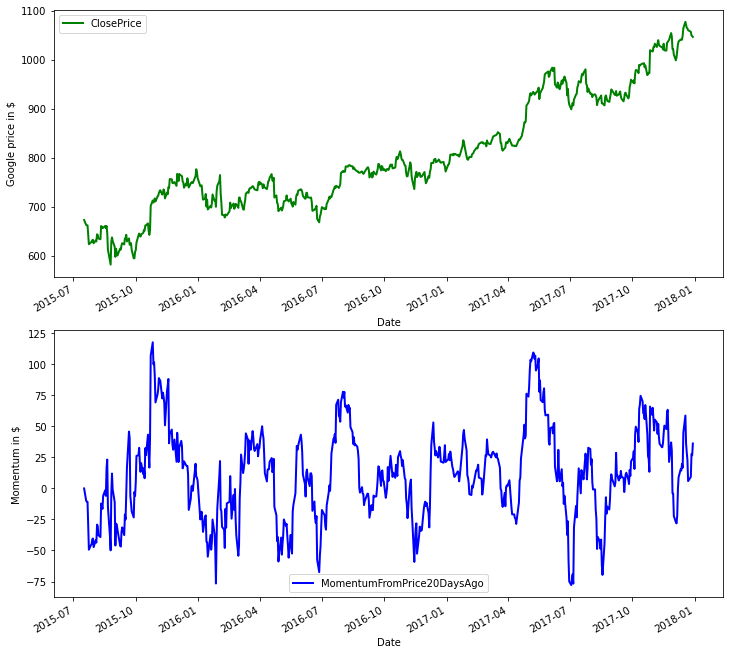

In [6]:

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Momentum in $')
mom.plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()